# Homework #8

**Due by midnight on Monday April 26, 2021**. Answer all of the following problems. These problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 

## Computational Problems

### Problem #1

#### (a) Using the divusa data, fit a regression of with divorce as the response and unemployed, femlab, marriage, birth, and military as predictors. Compute the variance inflation factors VIFs for each $\widehat\beta_j$, $j = 1,...,p$. Is there evidence that collinearity causes some predictors not to be significant? Explain your answer.



In [1]:
library(faraway) #vif() will calculate variance inflation factors...
data(divusa)
library(pls)
library(MASS)


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



In [2]:
library(leaps)

In [3]:
lmod=lm(divorce~unemployed+femlab+marriage+birth+military,data=divusa)
vif(lmod)

unemployed     femlab   marriage      birth   military 
  2.252888   3.613276   2.864864   2.585485   1.249596

Answer:

VIF greater than 10 are evidence of collinearity. No evidence of large colinearity in the predictors but colieanrity may still be reduced.

In [4]:
summary(lmod)


Call:
lm(formula = divorce ~ unemployed + femlab + marriage + birth + 
    military, data = divusa)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8611 -0.8916 -0.0496  0.8650  3.8300 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.48784    3.39378   0.733   0.4659    
unemployed  -0.11125    0.05592  -1.989   0.0505 .  
femlab       0.38365    0.03059  12.543  < 2e-16 ***
marriage     0.11867    0.02441   4.861 6.77e-06 ***
birth       -0.12996    0.01560  -8.333 4.03e-12 ***
military    -0.02673    0.01425  -1.876   0.0647 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.65 on 71 degrees of freedom
Multiple R-squared:  0.9208,	Adjusted R-squared:  0.9152 
F-statistic: 165.1 on 5 and 71 DF,  p-value: < 2.2e-16


#### (b) Does the removal of insignificant predictors from the model reduce the collinearity? Investigate.

In [6]:
lmod1=lm(divorce~femlab+marriage+birth,data=divusa)
vif(lmod1)

femlab marriage    birth 
1.893390 2.201891 2.008469

Answer:

The removal of insignificant predictors from the model reduce the collinearity because vifs decreased.

### Problem #2


Consider the fat dataset, with percentage of body fat, siri, as the response and the other variables, except brozek and density, as potential predictors. 

#### Remove every tenth observation from the data for use as a test sample. Use the remaining data as a training sample building the following models:

1. Linear regression with all mentioned predictors.
2. Linear regression with variables selected using AIC.
3. Principal component regression.
4. Ridge regression.

#### Use the models you find to predict the response in the test sample. Make a report on the performance of the models. 

In [3]:
#1, linear regression with all mentioned predictors
data(fat)

In [4]:
#function to remove every tenth oversation from the data
Nth.delete<-function(dataframe, n)dataframe[-(seq(n,to=nrow(dataframe),by=n)),]

In [5]:
Nth<-function(dataframe, n)dataframe[(seq(n,to=nrow(dataframe),by=n)),]

In [6]:
#remaining data as training sample
train<-Nth.delete(fat,10)
train<-subset(train, select = -c(1,3))

In [7]:
#removed every tenth observation as test sample
test<-Nth(fat,10)
test<-subset(test, select = -c(1,3) )

In [8]:
#fit mentioned predictios
lmod2=lm(siri~.,data=train)
summary(lmod2)


Call:
lm(formula = siri ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8314 -0.6722  0.1828  0.9150  6.6619 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.591885   6.448868  -1.953 0.052193 .  
age           0.007978   0.012320   0.648 0.517983    
weight        0.362999   0.023314  15.570  < 2e-16 ***
height        0.049026   0.040315   1.216 0.225315    
adipos       -0.514032   0.114074  -4.506 1.09e-05 ***
free         -0.564773   0.014889 -37.933  < 2e-16 ***
neck          0.016525   0.089863   0.184 0.854272    
chest         0.120219   0.039590   3.037 0.002694 ** 
abdom         0.140108   0.042186   3.321 0.001056 ** 
hip           0.006197   0.056101   0.110 0.912148    
thigh         0.195057   0.054460   3.582 0.000424 ***
knee          0.106637   0.093534   1.140 0.255542    
ankle         0.125118   0.081303   1.539 0.125325    
biceps        0.096199   0.064656   1.488 0.138278    
forearm       0.230775

Warning message in n * log(rs$rss/n) + 2 * (2:16):
“longer object length is not a multiple of shorter object length”

Subset selection object
Call: regsubsets.formula(siri ~ ., data = train)
15 Variables  (and intercept)
        Forced in Forced out
age         FALSE      FALSE
weight      FALSE      FALSE
height      FALSE      FALSE
adipos      FALSE      FALSE
free        FALSE      FALSE
neck        FALSE      FALSE
chest       FALSE      FALSE
abdom       FALSE      FALSE
hip         FALSE      FALSE
thigh       FALSE      FALSE
knee        FALSE      FALSE
ankle       FALSE      FALSE
biceps      FALSE      FALSE
forearm     FALSE      FALSE
wrist       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         age weight height adipos free neck chest abdom hip thigh knee ankle
1  ( 1 ) " " " "    " "    " "    " "  " "  " "   "*"   " " " "   " "  " "  
2  ( 1 ) " " "*"    " "    " "    "*"  " "  " "   " "   " " " "   " "  " "  
3  ( 1 ) " " "*"    " "    " "    "*"  " "  " "   " "   " " " "   " "  " "  
4  ( 1 ) " " "*"    " "    " "    "*"  " "  " "   " "   " " " 

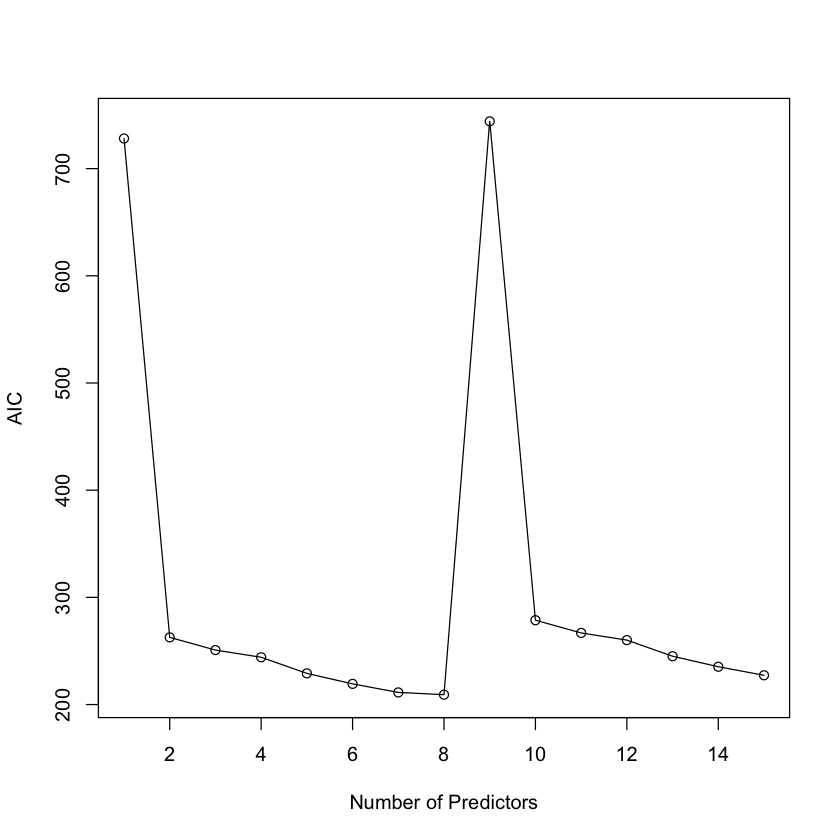

In [9]:
##2, Linear regression with variables selected using AIC.
n = length(train$siri)
b = regsubsets(siri ~., data = train)
rs = summary(b); aic = n*log(rs$rss/n) + 2*(2:16); i = which.min(aic)
plot(aic ~ I(1:15), ylab = "AIC", xlab = "Number of Predictors", 
     type = "o")

aic = train[,rs$which[i,2]];

rs

In [10]:
lmod_3_aic=lm(siri~weight+adipos+free+chest+abdom+chest+ankle+forearm,data=train)
summary(lmod_3_aic)


Call:
lm(formula = siri ~ weight + adipos + free + chest + abdom + 
    chest + ankle + forearm, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0444 -0.6219  0.1988  0.9227  7.4828 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.61511    3.15409   1.463 0.144842    
weight       0.41293    0.01878  21.992  < 2e-16 ***
adipos      -0.42855    0.08938  -4.795 3.01e-06 ***
free        -0.56155    0.01469 -38.230  < 2e-16 ***
chest        0.06338    0.03708   1.709 0.088841 .  
abdom        0.14720    0.04032   3.650 0.000327 ***
ankle        0.14601    0.08074   1.808 0.071926 .  
forearm      0.30790    0.06909   4.457 1.33e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.621 on 219 degrees of freedom
Multiple R-squared:  0.965,	Adjusted R-squared:  0.9639 
F-statistic: 863.1 on 7 and 219 DF,  p-value: < 2.2e-16


Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.072 1.2415 1.04228 0.82869 0.77340 0.60565 0.57145
Proportion of Variance 0.629 0.1028 0.07242 0.04578 0.03988 0.02445 0.02177
Cumulative Proportion  0.629 0.7317 0.80414 0.84992 0.88980 0.91425 0.93602
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     0.52205 0.44467 0.42667 0.35774 0.2765 0.21504 0.19703
Proportion of Variance 0.01817 0.01318 0.01214 0.00853 0.0051 0.00308 0.00259
Cumulative Proportion  0.95419 0.96738 0.97951 0.98804 0.9931 0.99622 0.99881
                          PC15
Standard deviation     0.13350
Proportion of Variance 0.00119
Cumulative Proportion  1.00000

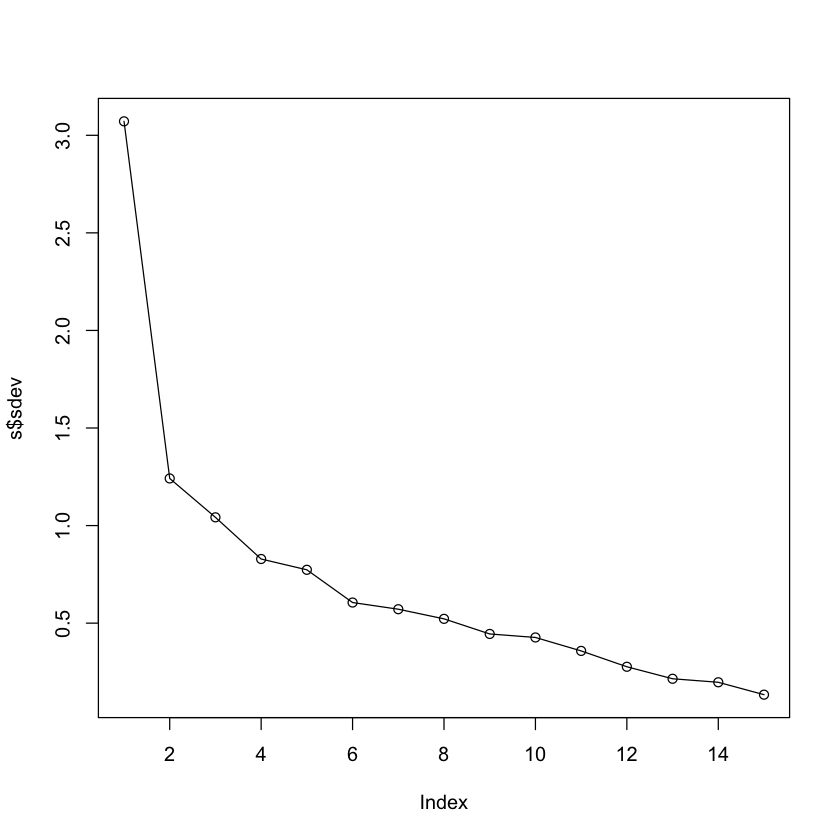

In [11]:
#principle conponent regression
s = prcomp(train[,-1], scale = T)
summary(s)
plot(s$sdev, type = "o")

In [14]:
#fit model using first 10 pcs
#using the first 10 pcs is good enough in terms of proportion of variance explained
PCR=data.frame(siri=train$siri,s$x[,1:10]);
lmodPCR=lm(siri~.,PCR)
summary(lmodPCR)
s


Call:
lm(formula = siri ~ ., data = PCR)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7344 -1.5599  0.1436  1.6026 13.7149 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.18018    0.16528 116.044  < 2e-16 ***
PC1          1.68153    0.05393  31.180  < 2e-16 ***
PC2         -3.47334    0.13343 -26.032  < 2e-16 ***
PC3         -0.99594    0.15893  -6.267 1.97e-09 ***
PC4          0.20279    0.19989   1.015    0.311    
PC5          1.51306    0.21418   7.064 2.19e-11 ***
PC6          5.82591    0.27351  21.301  < 2e-16 ***
PC7          1.74098    0.28988   6.006 7.97e-09 ***
PC8          0.10819    0.31730   0.341    0.733    
PC9          5.06389    0.37252  13.593  < 2e-16 ***
PC10        -1.82909    0.38824  -4.711 4.41e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.49 on 216 degrees of freedom
Multiple R-squared:  0.9186,	Adjusted R-squared:  0.9148 
F-statistic: 243.7 on 10 and 21

Standard deviations (1, .., p=15):
 [1] 3.0715530 1.2415034 1.0422823 0.8286901 0.7733985 0.6056492 0.5714494
 [8] 0.5220524 0.4446668 0.4266684 0.3577370 0.2765218 0.2150414 0.1970330
[15] 0.1335037

Rotation (n x k) = (15 x 15):
               PC1          PC2          PC3         PC4         PC5
age     0.01169678 -0.588998912  0.609188656  0.07211022 -0.05480112
weight  0.31933290  0.009836913 -0.028851519  0.07204778  0.13819519
height  0.08951198  0.535079098  0.507201547  0.04746737  0.48587864
adipos  0.29508307 -0.242189077 -0.170175950  0.01350687  0.04848739
free    0.25633987  0.349826363  0.080043949  0.04832617  0.02044600
neck    0.28172935 -0.056549415  0.154272847 -0.19737598  0.04492516
chest   0.29356173 -0.199784797  0.013470506 -0.02955190  0.14766639
abdom   0.28909618 -0.272990764 -0.039638386  0.08725232  0.22119997
hip     0.30258866 -0.053382999 -0.192477400  0.15890630  0.14986646
thigh   0.28546523  0.037805767 -0.328714546  0.06987704  0.08870801
knee    0.

In [29]:
m=colMeans(train[,-1])
sdeviation=apply(train[,-1],2,sd)
testP=test[,-1]
testPredictors=matrix(NA,nrow=dim(testP)[1],ncol=dim(testP)[2])

In [30]:
for(i in 1:length(testP)){
    testPredictors[,i]=(testP[,i]-m[i])/sdeviation[i]
}

In [31]:
#calculate mse
V=s$rotation
Ctest=testPredictors%*%V[,1:10]
prePCR=cbind(1,Ctest)%*%lmodPCR$coef

msePCR=mean((test$siri-prePCR)^2)
msePCR

[1] 3.144875

In [32]:
#ridge regression
par(mfrow=c(1,1))
trainRidge=data.frame(siri=train$siri-mean(train$siri),scale(train[,-1]))
testRidge=data.frame(siri=test$siri-mean(test$siri),scale(test[,-1]))

modified HKB estimator is 0.1340921 
modified L-W estimator is 0.4446052 
smallest value of GCV  at 0.0467 


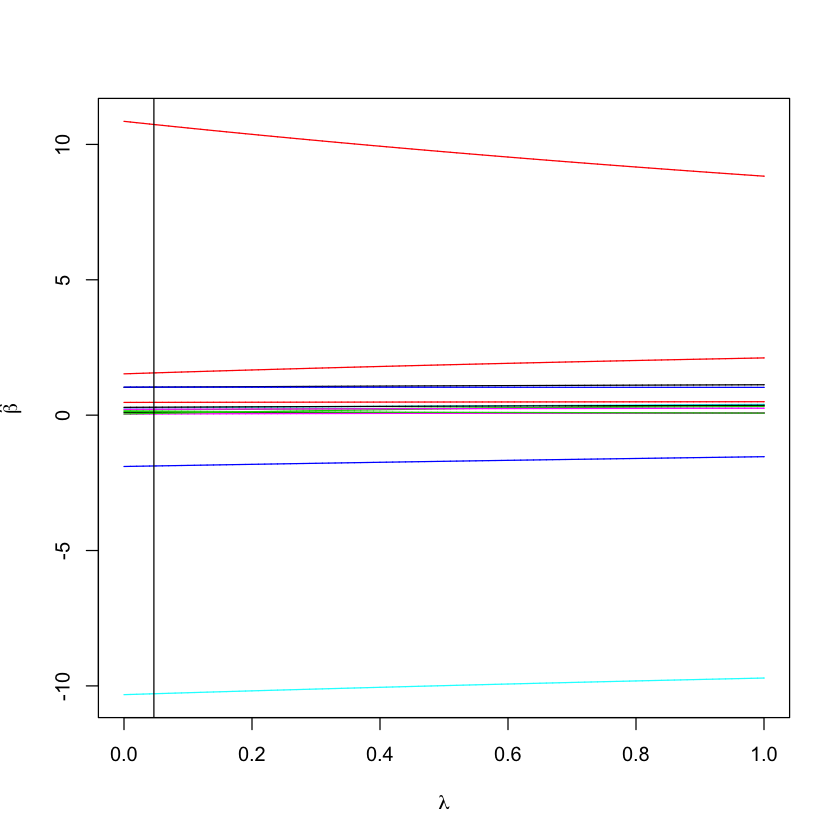

In [44]:
lmodRidge=lm.ridge(siri ~.,data=trainRidge,lambda=seq(0,1,1e-4))
matplot(lmodRidge$lambda,t(lmodRidge$coef),
    type="l",lty=1,xlab=expression(lambda),ylab=expression(hat(beta)))
select(lmodRidge)
lmodRidge=lm.ridge(siri~.,data=trainRidge,lambda=0.0467)

abline(v=0.0467)

In [49]:
yhat=as.matrix(trainRidge[,-1])%*%lmodRidge$coef + mean(train$siri)
mean((yhat-train$siri)^2)

[1] 2.233848

In [50]:
predicted=as.matrix(testRidge[,-1])%*%lmodRidge$coef+mean(train$siri)

In [51]:
sqrt(mean((predicted-test$siri)^2))

[1] 1.899253

Answer:

PCR is not a good idea for this data. I think AIC is the best model.

### Problem #3

Use the peatpos data with hipcenter as the response.

#### (a) Fit a model with all eight predictors. Comment on the effect of leg length on the response. 

In [14]:
data(seatpos)

In [15]:
lmod_3=lm(hipcenter~., data=seatpos)

In [16]:
summary(lmod_3)


Call:
lm(formula = hipcenter ~ ., data = seatpos)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.827 -22.833  -3.678  25.017  62.337 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 436.43213  166.57162   2.620   0.0138 *
Age           0.77572    0.57033   1.360   0.1843  
Weight        0.02631    0.33097   0.080   0.9372  
HtShoes      -2.69241    9.75304  -0.276   0.7845  
Ht            0.60134   10.12987   0.059   0.9531  
Seated        0.53375    3.76189   0.142   0.8882  
Arm          -1.32807    3.90020  -0.341   0.7359  
Thigh        -1.14312    2.66002  -0.430   0.6706  
Leg          -6.43905    4.71386  -1.366   0.1824  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.72 on 29 degrees of freedom
Multiple R-squared:  0.6866,	Adjusted R-squared:  0.6001 
F-statistic:  7.94 on 8 and 29 DF,  p-value: 1.306e-05


Answer:
The estimated coefficient is -6.43905. However, the p value is not significant, so we shouldn't conclude too much from it. 

#### (b) Compute a 95% prediction interval for the response at the mean value of the predictors. 

In [49]:
m=data.frame(Age=35.26,Weight=155.6)

In [17]:
data.frame(colMeans(seatpos))

m = colMeans(model.matrix(lmod_3)[,-1]); m; newdata = data.frame(t(m));

,colMeans.seatpos.
Age,35.26316
Weight,155.63158
HtShoes,171.38947
Ht,169.08421
Seated,88.95263
Arm,32.21579
Thigh,38.65526
Leg,36.26316
hipcenter,-164.88487


Age    Weight   HtShoes        Ht    Seated       Arm     Thigh       Leg 
 35.26316 155.63158 171.38947 169.08421  88.95263  32.21579  38.65526  36.26316

In [20]:
predict(lmod_3, newdata = newdata, interval = "predict")

fit,lwr,upr
-164.8849,-243.04,-86.72972


#### (c) Use AIC to select a model. Now interpret the effect of leg length and compute the prediction interval. Compare the conclusions from the two models. 

Subset selection object
Call: regsubsets.formula(hipcenter ~ ., data = seatpos)
8 Variables  (and intercept)
        Forced in Forced out
Age         FALSE      FALSE
Weight      FALSE      FALSE
HtShoes     FALSE      FALSE
Ht          FALSE      FALSE
Seated      FALSE      FALSE
Arm         FALSE      FALSE
Thigh       FALSE      FALSE
Leg         FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         Age Weight HtShoes Ht  Seated Arm Thigh Leg
1  ( 1 ) " " " "    " "     "*" " "    " " " "   " "
2  ( 1 ) " " " "    " "     "*" " "    " " " "   "*"
3  ( 1 ) "*" " "    " "     "*" " "    " " " "   "*"
4  ( 1 ) "*" " "    "*"     " " " "    " " "*"   "*"
5  ( 1 ) "*" " "    "*"     " " " "    "*" "*"   "*"
6  ( 1 ) "*" " "    "*"     " " "*"    "*" "*"   "*"
7  ( 1 ) "*" "*"    "*"     " " "*"    "*" "*"   "*"
8  ( 1 ) "*" "*"    "*"     "*" "*"    "*" "*"   "*"


Call:
lm(formula = hipcenter ~ Age + Ht + Leg, data = seatpos)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.715 -22.758  -4.102  21.394  60.576 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 452.1976   100.9482   4.480 8.04e-05 ***
Age           0.5807     0.3790   1.532   0.1347    
Ht           -2.3254     1.2545  -1.854   0.0725 .  
Leg          -6.7390     4.1050  -1.642   0.1099    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35.12 on 34 degrees of freedom
Multiple R-squared:  0.6814,	Adjusted R-squared:  0.6533 
F-statistic: 24.24 on 3 and 34 DF,  p-value: 1.426e-08


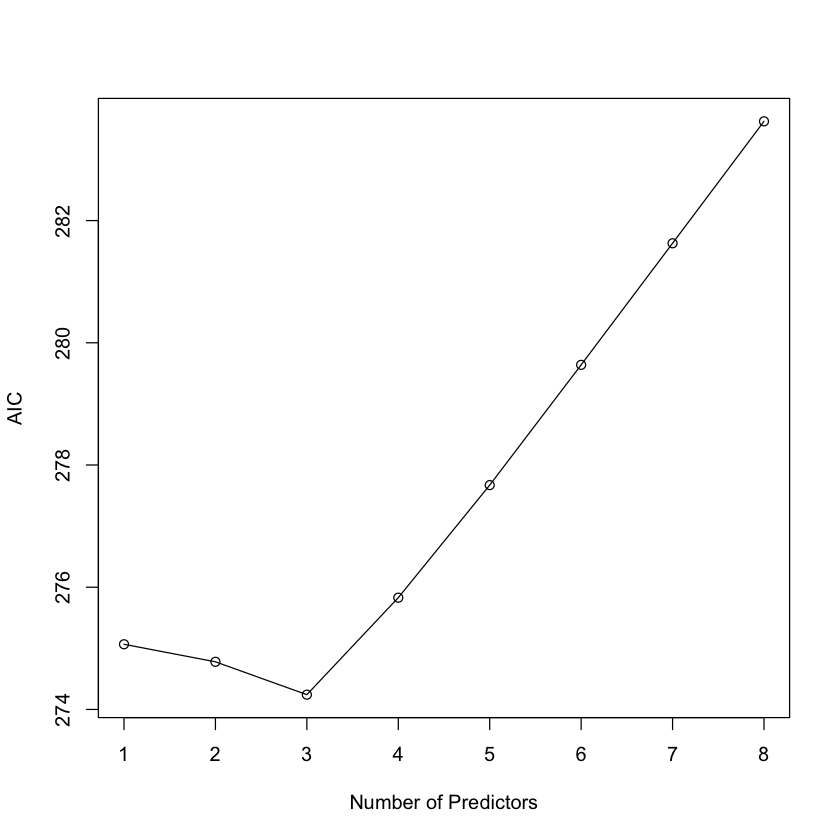

In [21]:
##2, Linear regression with variables selected using AIC.
n1 = length(seatpos$hipcenter)
b1 = regsubsets(hipcenter ~ ., data = seatpos)
rs1 = summary(b1); aic = n1*log(rs1$rss/n1) + 2*(2:9); i = which.min(aic)
plot(aic ~ I(1:8), ylab = "AIC", xlab = "Number of Predictors", 
     type = "o")

aic = seatpos[,rs1$which[i,2]];

rs1

lmod_3_aic<-lm(hipcenter~Age+Ht+Leg, data=seatpos)
summary(lmod_3_aic)

In [28]:
#prediction interval

m1 = colMeans(model.matrix(lmod_3_aic)[,-1]); m1; newdata = data.frame(t(m1));
predict(lmod_3_aic, newdata = newdata, interval = "predict")

Age        Ht       Leg 
 35.26316 169.08421  36.26316

fit,lwr,upr
-164.8849,-237.192,-92.57771


Answer:

The estimated coefficient is -6.739.However, the p value is not significant, so we shouldn't conclude too much from it.The two models have similar conclusions. 

### Problem #4

#### Using the pulp data, determine whether there are any differences between the operators. What is the nature of these differences?

In [23]:
library(faraway)
data(pulp)

In [24]:
anov = lm(bright ~ operator, data = pulp)
summary(anov)
anov2 = aov(bright ~ operator, data = pulp)
TukeyHSD(anov2)


Call:
lm(formula = bright ~ operator, data = pulp)

Residuals:
   Min     1Q Median     3Q    Max 
-0.440 -0.195 -0.070  0.175  0.560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  60.2400     0.1458 413.243   <2e-16 ***
operatorb    -0.1800     0.2062  -0.873   0.3955    
operatorc     0.3800     0.2062   1.843   0.0839 .  
operatord     0.4400     0.2062   2.134   0.0486 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.326 on 16 degrees of freedom
Multiple R-squared:  0.4408,	Adjusted R-squared:  0.3359 
F-statistic: 4.204 on 3 and 16 DF,  p-value: 0.02261


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = bright ~ operator, data = pulp)

$operator
     diff         lwr       upr     p adj
b-a -0.18 -0.76981435 0.4098143 0.8185430
c-a  0.38 -0.20981435 0.9698143 0.2903038
d-a  0.44 -0.14981435 1.0298143 0.1844794
c-b  0.56 -0.02981435 1.1498143 0.0657945
d-b  0.62  0.03018565 1.2098143 0.0376691
d-c  0.06 -0.52981435 0.6498143 0.9910783


Answer:

given p<0.05, there's a significant difference between the operators.

The nature of the differences can be explained by the TukeyHSD table. 

### Problem #5

The morley data can be  viewed as a randomized block experiment with Run as the treatment factor and Expt as the blocking factor. 

#### Is there a difference between runs and what efficiency is gained  by blocking? (Make sure factors are stored in R as factors!)

In [25]:
data(morley)
head(morley)
morley$Expt = as.factor(morley$Expt)
morley$Run = as.factor(morley$Run)

,Expt,Run,Speed
001,1,1,850
002,1,2,740
003,1,3,900
004,1,4,1070
005,1,5,930
006,1,6,850


In [26]:
lmod = lm(Speed ~ Expt + Run, data = morley)
summary(lmod)
anova(lmod)


Call:
lm(formula = Speed ~ Expt + Run, data = morley)

Residuals:
    Min      1Q  Median      3Q     Max 
-206.60  -37.35    4.90   44.27  132.90 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.506e+02  3.599e+01  26.413  < 2e-16 ***
Expt2       -5.300e+01  2.323e+01  -2.281 0.025325 *  
Expt3       -6.400e+01  2.323e+01  -2.755 0.007343 ** 
Expt4       -8.850e+01  2.323e+01  -3.810 0.000281 ***
Expt5       -7.750e+01  2.323e+01  -3.336 0.001317 ** 
Run2        -5.200e+01  4.646e+01  -1.119 0.266588    
Run3        -2.800e+01  4.646e+01  -0.603 0.548545    
Run4         6.000e+00  4.646e+01   0.129 0.897591    
Run5        -7.600e+01  4.646e+01  -1.636 0.106032    
Run6        -1.040e+02  4.646e+01  -2.238 0.028125 *  
Run7        -1.000e+02  4.646e+01  -2.152 0.034551 *  
Run8        -4.000e+01  4.646e+01  -0.861 0.391996    
Run9        -1.000e+01  4.646e+01  -0.215 0.830167    
Run10       -3.800e+01  4.646e+01  -0.818 0.415992    
Run11      

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Expt,4,94514,23628.500,4.378144,0.003070589
Run,19,113344,5965.474,1.105348,0.363209341
Residuals,76,410166,5396.921,NA,NA


In [27]:
5965.474/5396.921

[1] 1.105348

Answer:

There's no significant difference between runs because the p value >0.05. The efficiency is that we need 1.1 more to have the same power as the block design